Found 720 images belonging to 9 classes.
Found 180 images belonging to 9 classes.
Epoch 1/50
22/22 [==============================] - 216s 6s/step - loss: 1.7367 - acc: 0.3430 - val_loss: 6.6361 - val_acc: 0.1312
Epoch 2/50
22/22 [==============================] - 109s 5s/step - loss: 1.3731 - acc: 0.4302 - val_loss: 8.5512 - val_acc: 0.1187
Epoch 3/50
22/22 [==============================] - 112s 5s/step - loss: 1.2371 - acc: 0.5044 - val_loss: 11.3163 - val_acc: 0.1063
Epoch 4/50
22/22 [==============================] - 103s 5s/step - loss: 1.1251 - acc: 0.5392 - val_loss: 10.2883 - val_acc: 0.1187
Epoch 5/50
22/22 [==============================] - 104s 5s/step - loss: 1.1098 - acc: 0.5247 - val_loss: 6.4885 - val_acc: 0.1187
Epoch 6/50
22/22 [==============================] - 101s 5s/step - loss: 0.9796 - acc: 0.5916 - val_loss: 5.6558 - val_acc: 0.1437
Epoch 7/50
22/22 [==============================] - 101s 5s/step - loss: 0.9227 - acc: 0.6337 - val_loss: 12.6593 - val_acc: 0.118

C:\Users\mttvi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mttvi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mttvi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

         CBC       0.00      0.00      0.00        20
          CD       0.00      0.00      0.00        20
          CI       0.00      0.00      0.00        20
          CM       0.00      0.00      0.00        20
       CNFCS       0.07      0.25      0.11        20
          GB       0.43      0.15      0.22        20
          MC       0.00      0.00      0.00        20
          PE       0.19      0.95      0.31        20
          TG       0.00      0.00      0.00        20

    accuracy                           0.15       180
   macro avg       0.08      0.15      0.07       180
weighted avg       0.08      0.15      0.07       180



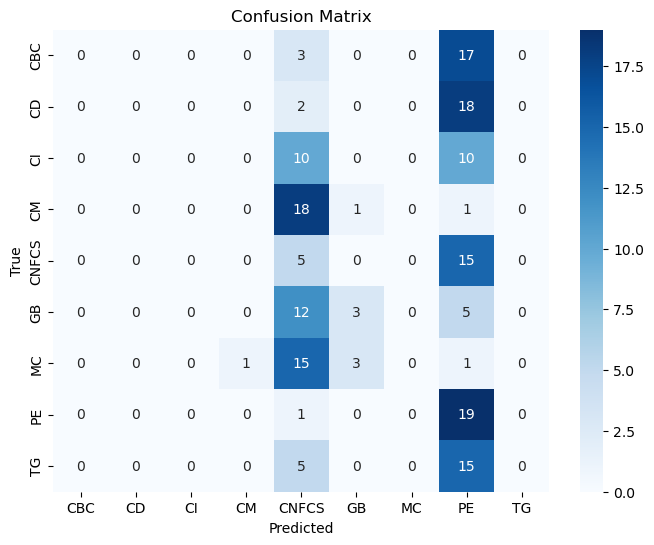

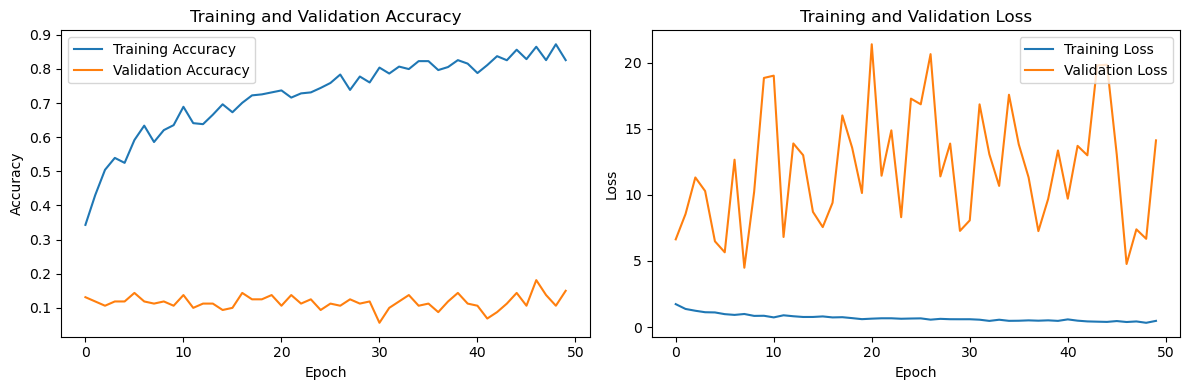

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configurações de diretório
data_dir = r"C:\Users\mttvi\OneDrive\Área de Trabalho\DB2\Feijaotex"
image_size = (256, 192)
batch_size = 32

# Pré-processamento dos dados com Data Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Definir o modelo MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False)

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dense(9, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

# Treinamento do modelo com data augmentation
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=50,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

# Avaliação do modelo
test_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Previsões
predictions = model.predict(test_generator)
y_true = test_generator.classes
y_pred = np.argmax(predictions, axis=1)

# Matriz de Confusão
cm = confusion_matrix(y_true, y_pred)

# Relatório de Classificação
class_labels = list(train_generator.class_indices.keys())
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=class_labels))

# Plotar Matriz de Confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plotar gráficos de treinamento
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
